In [2]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

__업종 중에서 가장 데이터가 많은 한식음식점업 : 그만큼 특이점이 적은 편__ 

In [32]:
hansik = pd.read_csv("업종별/한식 음식점업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [23]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

'건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '면세점', '비알콜 음료점업',
       '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '마사지업', ,  '기타 수상오락 서비스업', '그외 기타 분류안된 오락관련 서비스업', 

 '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업'  '자동차 임대업' '전시 및 행사 대행업','정기 항공 운송업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점','택시 운송업''피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업', '화장품 및 방향제 소매업',
       '휴양콘도 운영업', 
    

In [5]:
hansik.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697166 entries, 0 to 3697165
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      object
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(5), object(7)
memory usage: 366.7+ MB


In [33]:
df=hansik.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1)

In [34]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [35]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697166 entries, 0 to 3697165
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      object
 1   CARD_SIDO_NM  object
 2   STD_CLSS_NM   object
 3   HOM_SIDO_NM   object
 4   AGE           object
 5   SEX_CTGO_CD   int64 
 6   FLC           int64 
 7   CSTMR_CNT     int64 
 8   AMT           int64 
 9   CNT           int64 
 10  year          int64 
 11  month         int64 
dtypes: int64(7), object(5)
memory usage: 366.7+ MB
None
  REG_YYMM CARD_SIDO_NM STD_CLSS_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  \
0   201901           강원     한식 음식점업          강원  10s            1    1   
1   201901           강원     한식 음식점업          강원  10s            2    1   
2   201901           강원     한식 음식점업          강원  20s            1    1   
3   201901           강원     한식 음식점업          강원  20s            1    2   
4   201901           강원     한식 음식점업          강원  20s            2    1   

   CSTMR_CNT       AM

In [7]:
df.CARD_SIDO_NM.unique()
#17개 모든 시도에서 관찰

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [8]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
df1

CARD_SIDO_NM
세종      46005986127
대전     298645744118
제주     307362588806
울산     326736631176
충북     327145423793
강원     370698901284
전북     414051706774
전남     415104459425
광주     437997793732
충남     455818789615
경북     601238978060
인천     690480390079
대구     741676218433
경남     868903285921
부산    1110797367838
서울    2999269686135
경기    3325555768235
Name: AMT, dtype: int64

Text(0.5, 1.0, '한식 음식업점 지역별 AMT')

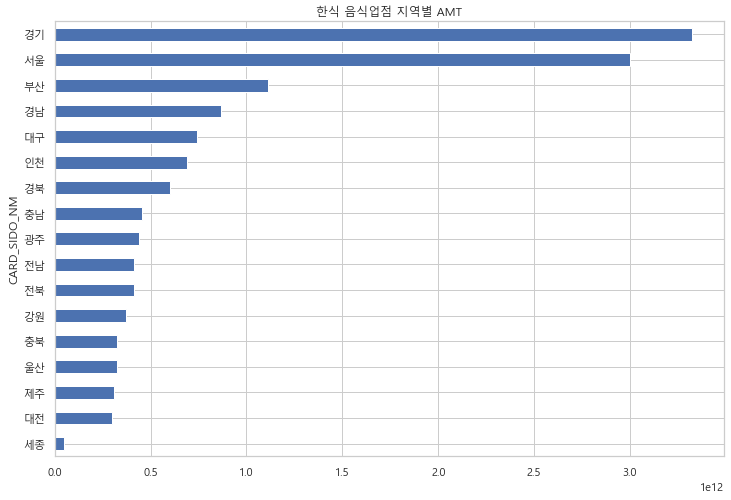

In [12]:
df1.plot(kind="barh", figsize=(12,8))
plt.title("한식 음식업점 지역별 AMT")

수도권인 경기 서울의 AMT가 (당연하게도) 제일 높음

In [10]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
df2

REG_YYMM
201901     944187262326
201902     828212673196
201903     979787456428
201904     929119635382
201905    1015171813989
201906     960618569071
201907     981571628843
201908    1010730528577
201909     889663829822
201910     954154772521
201911     913125674787
201912    1024610072785
202001     907512438086
202002     732449904652
202003     666573459086
Name: AMT, dtype: int64

Text(0.5, 1.0, '한식업 기간별 AMT')

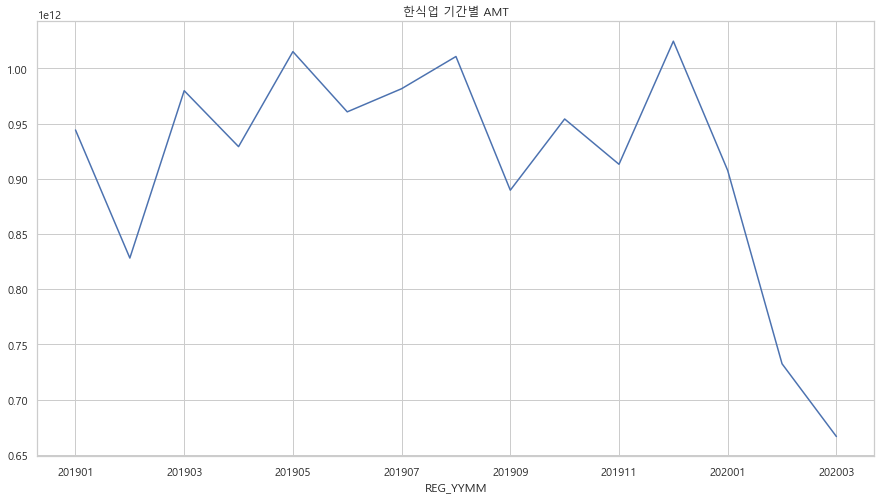

In [11]:
df2.plot(figsize=(15,8))
plt.title("한식업 기간별 AMT")

year
2019    11430953917727
2020     2306535801824
Name: AMT, dtype: int64


Text(0.5, 1.0, '한식 2019, 2020 AMT')

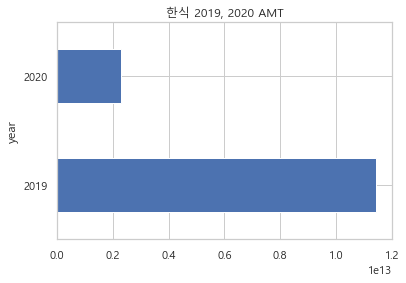

In [44]:
df6 = df.groupby('year')['AMT'].sum()
print(df6)
df6.plot(kind='barh')
plt.title("한식 2019, 2020 AMT")

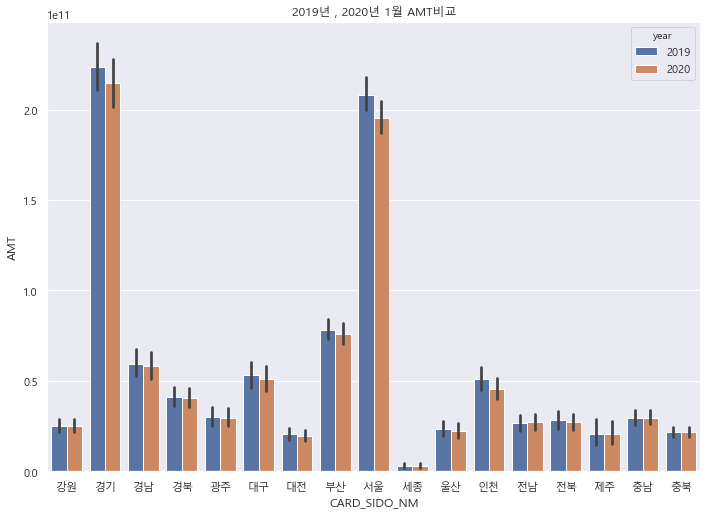

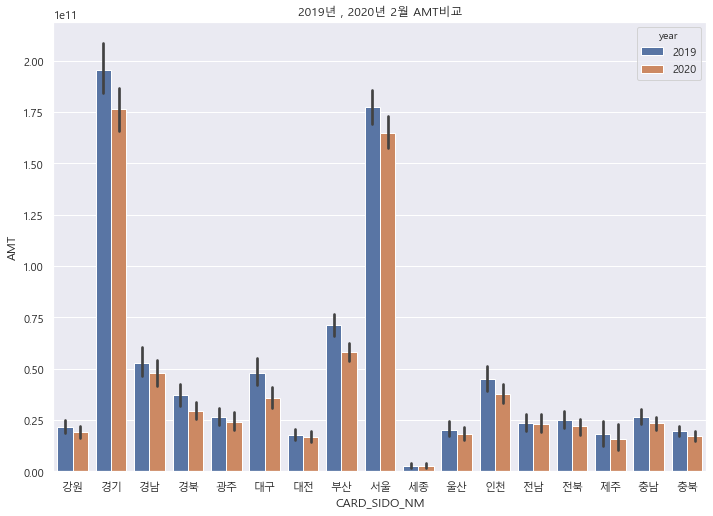

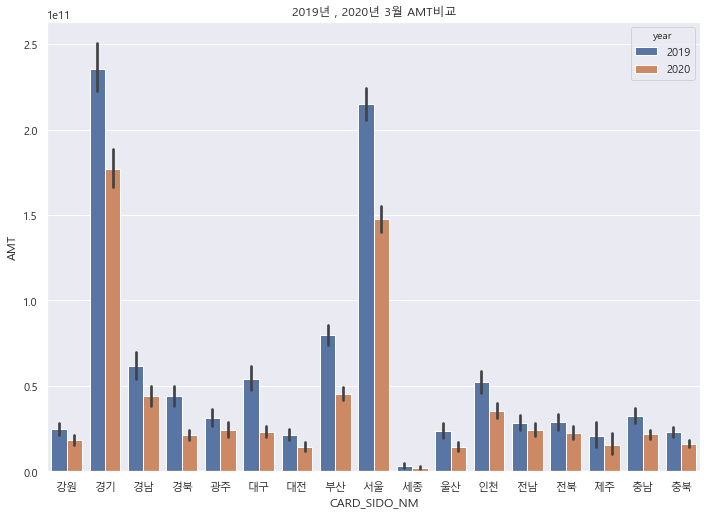

In [51]:
for i in range(1, 4):
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

In [12]:
df3 = df.groupby('AGE')['AMT'].sum()
df3

AGE
10s      29647144459
20s    1737798495616
30s    2673977162638
40s    3351655605494
50s    3640312467775
60s    1870892685162
70s     433206158407
Name: AMT, dtype: int64

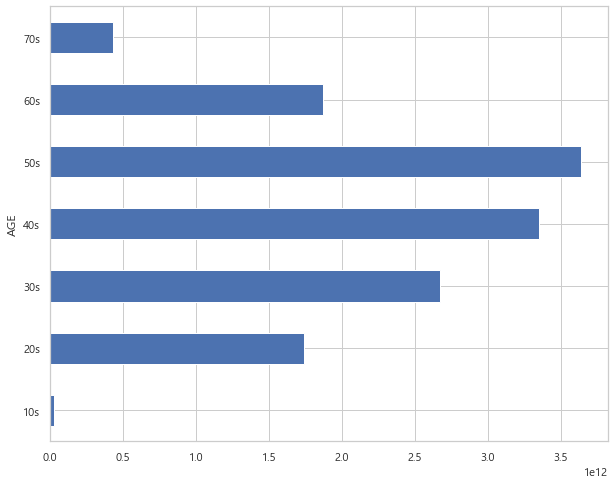

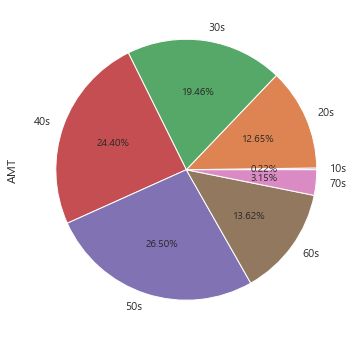

In [46]:
df3.plot(kind='barh', figsize=(10,8))
plt.show()
df3.plot(kind='pie',autopct='%1.2f%%',figsize=(6,6))

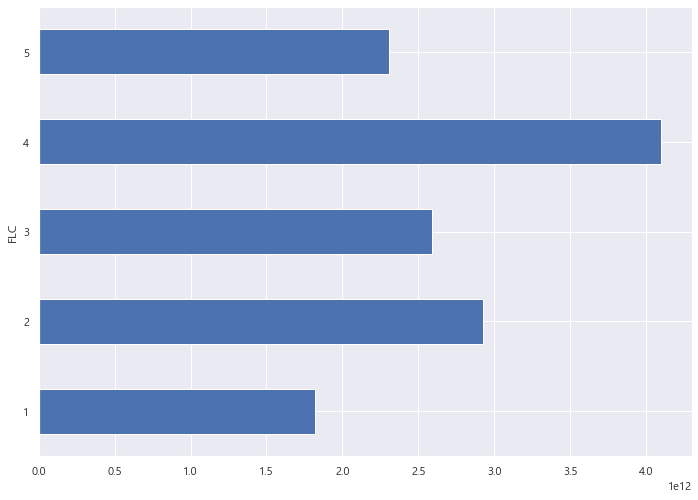

In [50]:
FLC = df.groupby('FLC')['AMT'].sum()
FLC.plot(kind='barh')

AMT총합 기준 성인자녀가구의 비중이 높고 나머진 비슷비슷 

__긁은 곳과 거주지가 같고 다르고__ 

In [14]:
df4 =hansik[hansik.CARD_SIDO_NM == hansik.HOM_SIDO_NM]
df5 =hansik[hansik.CARD_SIDO_NM != hansik.HOM_SIDO_NM]
print(df4.info())
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963891 entries, 0 to 3697165
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      963891 non-null  object
 1   CARD_SIDO_NM  963891 non-null  object
 2   CARD_CCG_NM   963529 non-null  object
 3   STD_CLSS_NM   963891 non-null  object
 4   HOM_SIDO_NM   963891 non-null  object
 5   HOM_CCG_NM    963529 non-null  object
 6   AGE           963891 non-null  object
 7   SEX_CTGO_CD   963891 non-null  int64 
 8   FLC           963891 non-null  int64 
 9   CSTMR_CNT     963891 non-null  int64 
 10  AMT           963891 non-null  int64 
 11  CNT           963891 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 95.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2733275 entries, 204 to 3697055
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      object
 1   CARD_SIDO_NM  object
 2   CARD_C

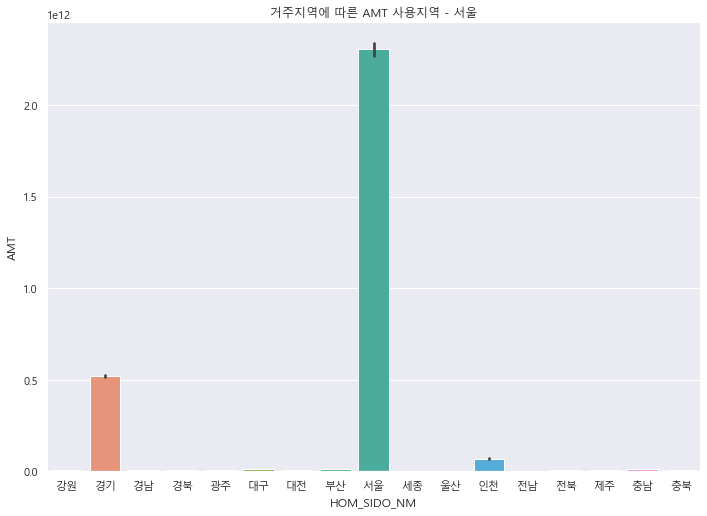

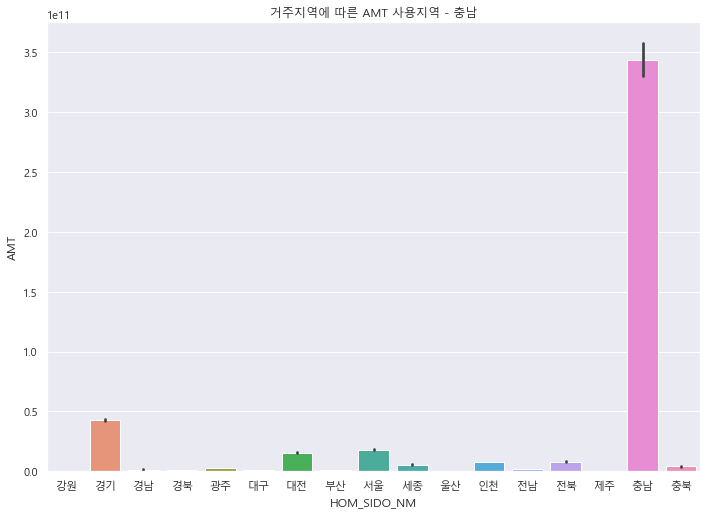

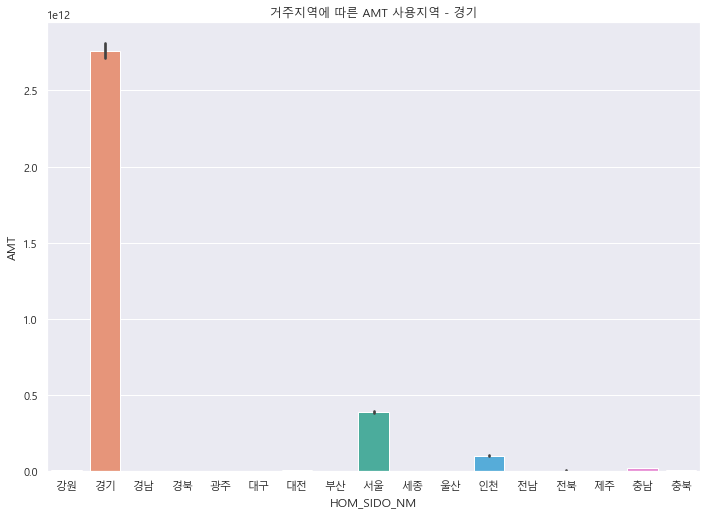

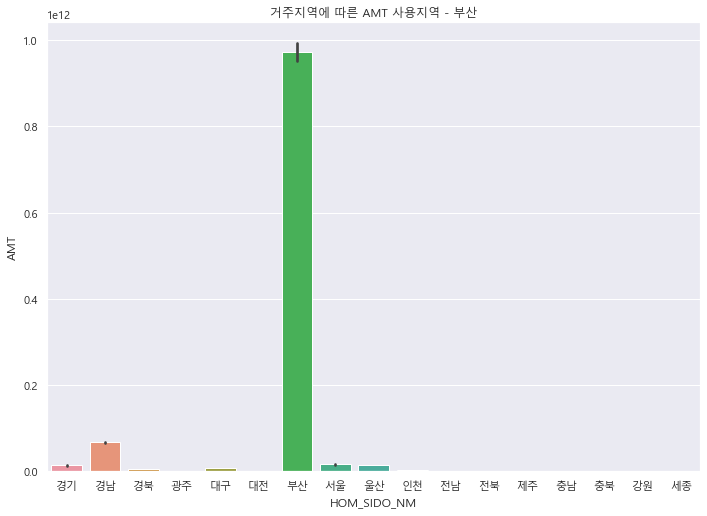

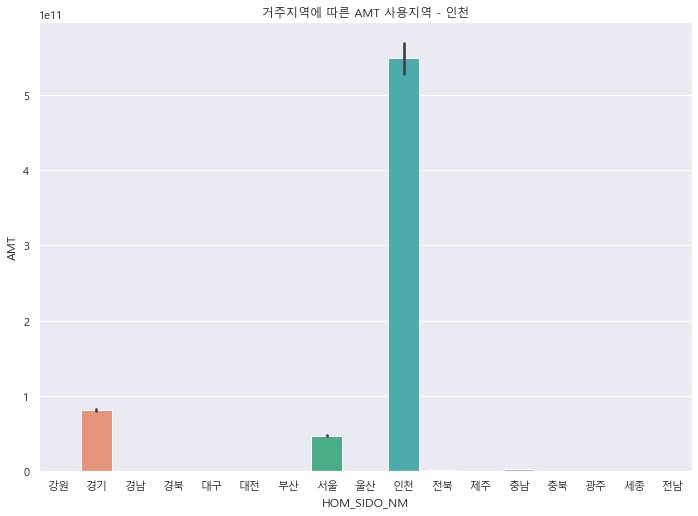

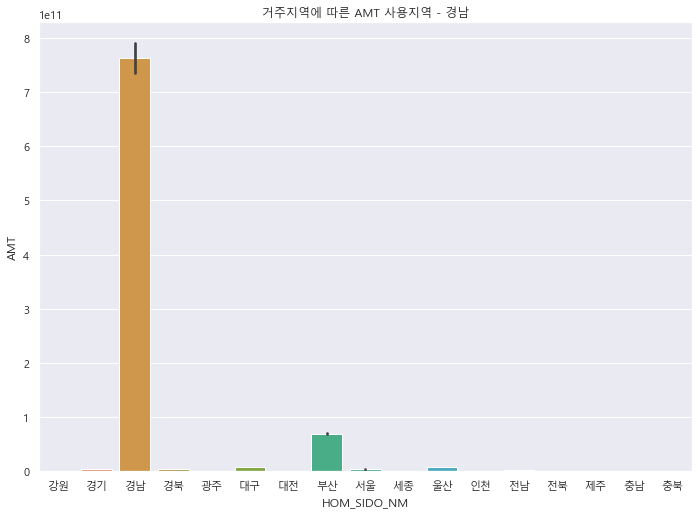

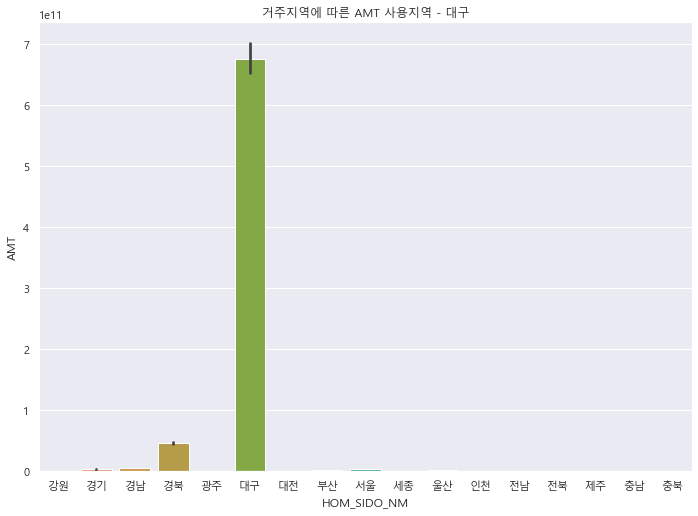

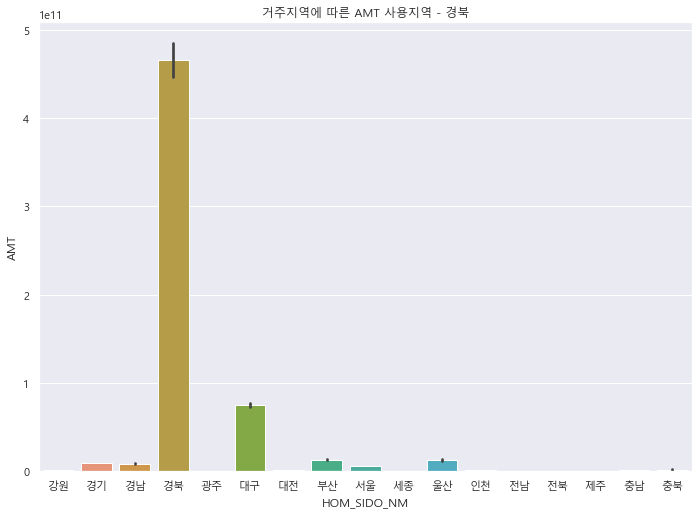

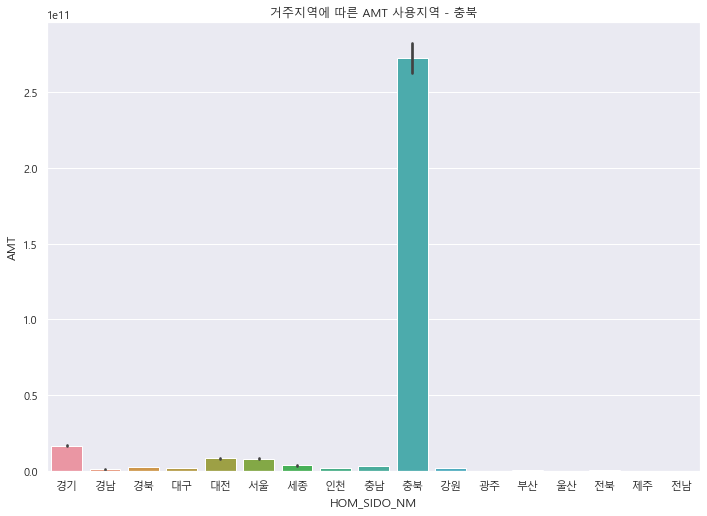

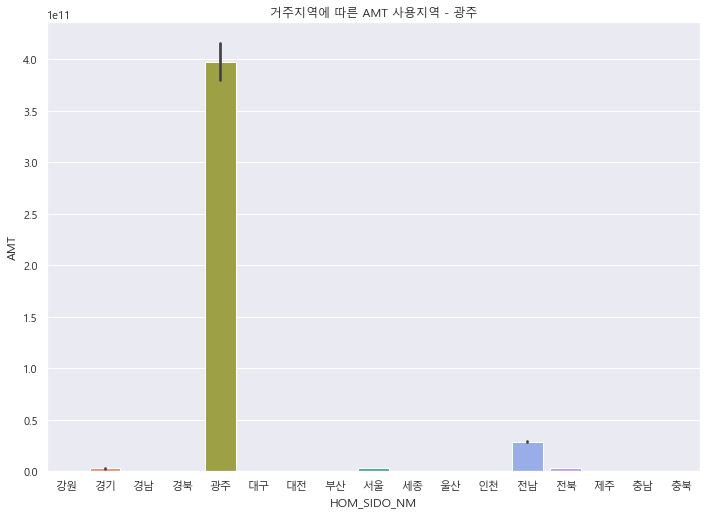

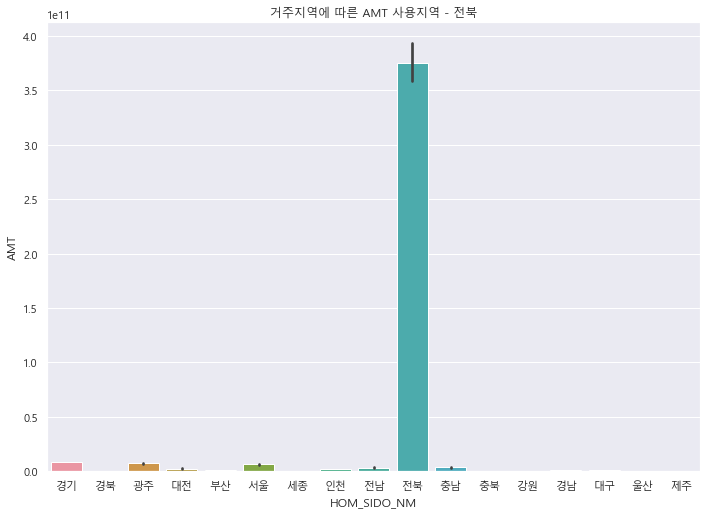

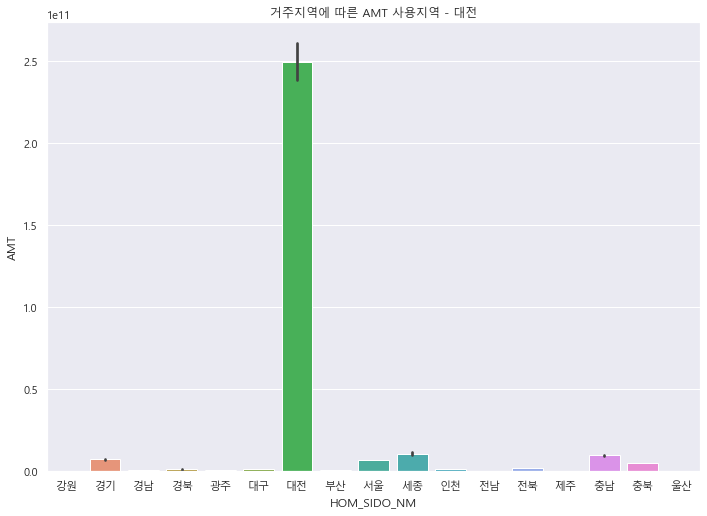

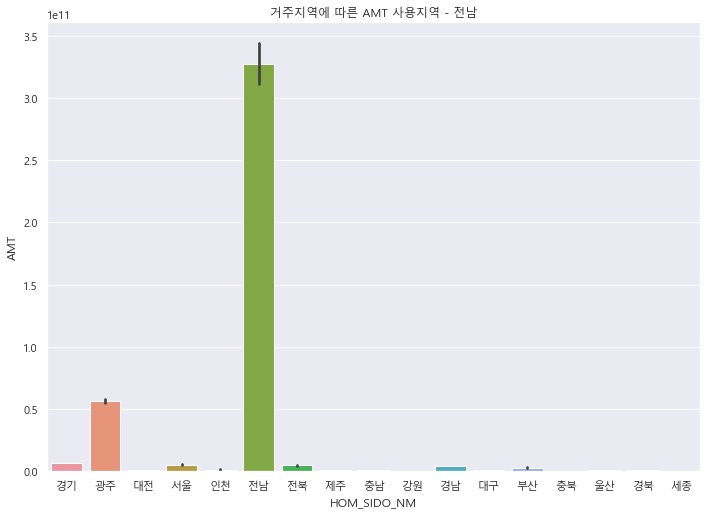

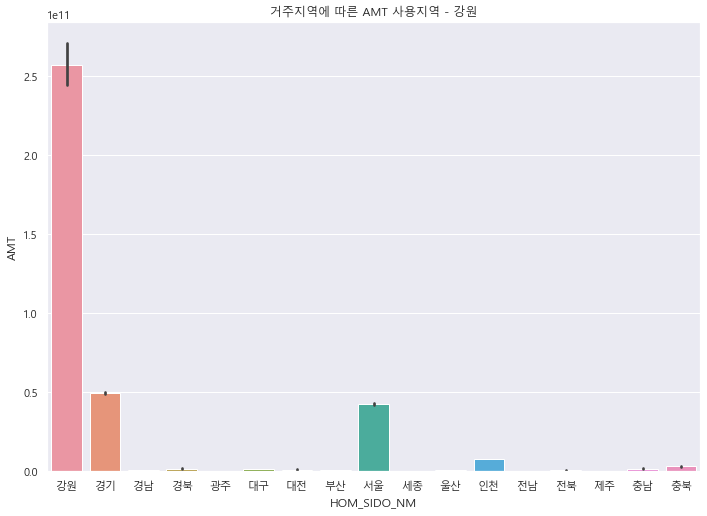

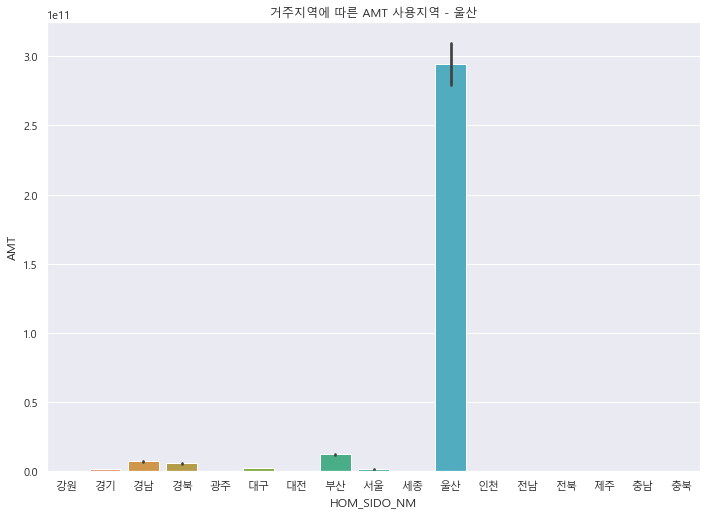

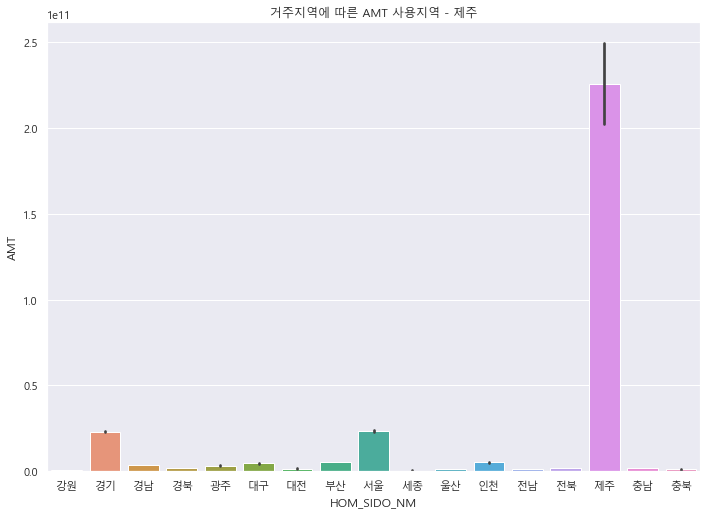

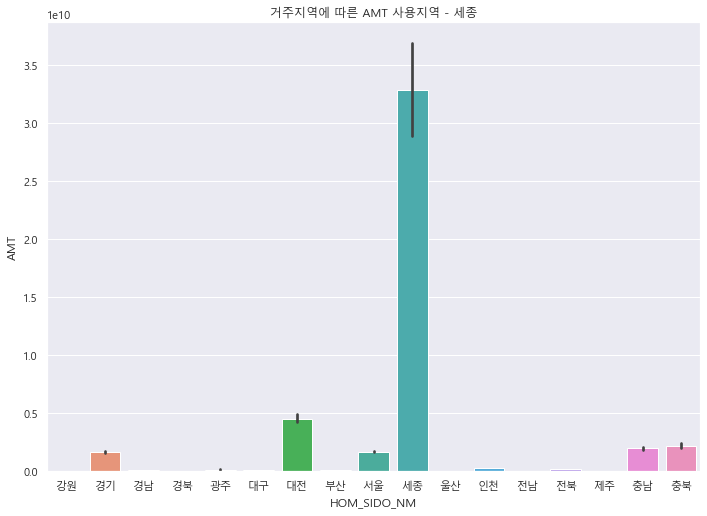

In [47]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()

-대체적으로 자기 지역에서 사용하는 편이고, 해당 근접한 광역시에서 사용하는 부분이 있다(광역시의 경우 본인 지역 사용량이 큼 )     
-강원도 같은 경우 서울 경기 두 지역에서 사용한다는 점이 다른 점    
-전북은 본인 지역 사용량이 크다 